<a href="https://colab.research.google.com/github/Saikat-93/deep_Learning_project/blob/main/dog_vs_cat_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:08<00:00, 90.6MB/s]
100% 812M/812M [00:09<00:00, 94.5MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
import os
#counting the number of files in train folder
path, dirs, files =next(os.walk('/content/train'))
file_count=len(files)
print('number of images:',file_count)

number of images: 25000


printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.4263.jpg', 'dog.1956.jpg', 'dog.1847.jpg', 'cat.4979.jpg', 'dog.5878.jpg', 'cat.3107.jpg', 'cat.4496.jpg', 'dog.2225.jpg', 'cat.1823.jpg', 'cat.9839.jpg', 'dog.6989.jpg', 'dog.641.jpg', 'dog.5228.jpg', 'cat.10019.jpg', 'cat.3539.jpg', 'dog.777.jpg', 'dog.12461.jpg', 'dog.11260.jpg', 'cat.8495.jpg', 'cat.4555.jpg', 'dog.6103.jpg', 'cat.4046.jpg', 'dog.12364.jpg', 'cat.10629.jpg', 'dog.6480.jpg', 'dog.9027.jpg', 'dog.2787.jpg', 'dog.8132.jpg', 'cat.6578.jpg', 'cat.2239.jpg', 'dog.2696.jpg', 'dog.10091.jpg', 'dog.4057.jpg', 'cat.6698.jpg', 'dog.12471.jpg', 'cat.1752.jpg', 'dog.3337.jpg', 'cat.9822.jpg', 'dog.3558.jpg', 'dog.7423.jpg', 'dog.3323.jpg', 'cat.3896.jpg', 'cat.12292.jpg', 'dog.6442.jpg', 'dog.588.jpg', 'dog.11719.jpg', 'cat.1733.jpg', 'cat.8706.jpg', 'cat.10522.jpg', 'dog.12291.jpg', 'dog.5407.jpg', 'cat.8153.jpg', 'cat.9808.jpg', 'cat.1350.jpg', 'dog.1172.jpg', 'cat.10036.jpg', 'dog.7575.jpg', 'cat.5959.jpg', 'dog.8486.jpg', 'cat.6855.jpg', 'cat.3965.jpg', 'cat.8570.jpg'

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

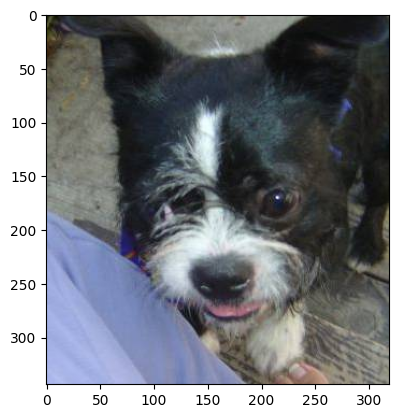

In [ ]:
img=mpimg.imread('/content/train/dog.12377.jpg')
imgplt=plt.imshow(img)
plt.show()

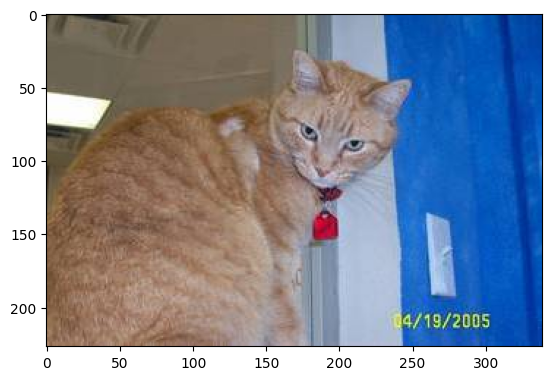

In [ ]:
img=mpimg.imread('/content/train/cat.1530.jpg')
imgplt=plt.imshow(img)
plt.show()

In [ ]:
file_names =os.listdir('/content/train/')
for i in range(5):

  name=file_names[i]
  print(name[0:3])

cat
dog
dog
cat
dog


In [ ]:
file_names =os.listdir('/content/train/')
dog_count =0
cat_count=0
for img_file in file_names:
  name =img_file[0:3]
  if name == 'dog':
    dog_count +=1
  else:
    cat_count +=1
print('number of dog images=',dog_count)
print('number of cat images=',cat_count)

number of dog images= 12500
number of cat images= 12500


resize all the images

In [ ]:
#creating a diractory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder='/content/train/'
resized_folder ='/content/image resized/'
for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')
  newImgPath = resized_folder + filename
  img.save(newImgPath)

In [ ]:
img=mpimg.imread('/content/image resized/')
imgplt=plt.imshow(img)
plt.show()

IsADirectoryError: [Errno 21] Is a directory: '/content/image resized/'

creating lebels for resized image of dog and cat

In [ ]:
#creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')
labels=[]
for i in range(2000):
  file_name =filenames[i]
  label=file_name[0:3]
  if label =='dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

In [ ]:
print(labels[0:5])
print(len(labels))

In [ ]:
#counting the images of dog and cats out of 2000 images
values,counts =np.unique(labels,return_counts=True)
print(values)
print(counts)

converting all resized images to numpy array

In [ ]:
import cv2
import glob

In [ ]:
image_directory='/content/image resized/'
image_extension =['png','jpg']
files=[]
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

In [ ]:
type(dog_cat_images)

In [ ]:
print(dog_cat_images.shape)

In [ ]:
x= dog_cat_images
y = np.asarray(labels)

train test split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
print(x_train_scaled)

building nural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model ='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model =hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [ ]:
num_of_classes =2
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
score,acc =model.evaluate(x_test_scaled,y_test)
print('Test Loss=',score)
print('Test Accuracy=',acc)

predictive system

In [ ]:
input_image_path = input('path of the image to be predicted')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction= model.predict(image_reshaped)
input_pred_lebel = np.argmax(input_prediction)
if input_pred_lebel == 1:
  print('the image represents a cat')

else:
  print('the image represents a dog')